# Homework 2

For each answer code cell, **do not** erase the line stating `#A1: your code here`; instead, write your answer code directly below the line.

When you turn in this homework, all cells must be executed and the notebook saved with output included. You must also save your **fully executed notebook** as a pdf following the instructions in the Student Handbook posted on Canvas > Modules > Course Policies.

A **fully executed notebook** means that you should be seeing the expected output printed below the cell after you click "Restart Kernel and Run All Cells." *If any cell in the PDF of your notebook does not have the expected output printed below it, it will not be considered fully executed and you will not receive points for the questions in that cell.*

**If you use any sources aside from the standard NumPy documentation, you must cite the sources (e.g., StackOverflow links) used to answer the below questions. If you use ChatGPT, you must include proof of the prompt you used, as well as an explanation of why the resulting code is correct.**

This homework consists of three sections: practice using NumPy, Pandas, and SQL. The goal of HW2 Part 1 is to practice more NumPy array skills. W2 Parts 2 and 3 focus on using Pandas and SQL for basic statistics on real datasets and basic plotting for data visualization.

**NetID:** kl739

---

## Problem 0
Do not move or modify this cell, we use it for automated homework analysis.

**This problem is for you to use to cite your sources.**

You will update this problem over the course of the homework. Describe problems, error messages, and bugs you encountered, and how you fixed or addressed them. List URLs for any online resources (like Stack Overflow) you found useful and mention fellow students, TAs, or other people who helped you. If you use ChatGPT, you must include proof of the prompt you used, as well as an explanation of why the resulting code is correct. If you do not appropriately fill out Problem 0, you will receive 0 points on the entire homework assignment.


**ADD YOUR SOURCES HERE**
https://www.geeksforgeeks.org/check-for-nan-in-pandas-dataframe/ \

https://www.atlassian.com/data/notebook/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe#:~:text=Within%20pandas%2C%20a%20missing%20value,using%20missing%20throughout%20this%20tutorial. \

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html \

ChatGPT prompt: "Explain Facetgrid map_dataframe()" I used this prompt to help me understand map_dataframe() and how to use it in Exercise D4. ChatGPT did not give me example code that was applicable to the context of D4, but I used it to determine what should be the arguments of map_dataframe().

---

# Part 0: Import Packages

In [1]:
import numpy as np
import pandas as pd
import duckdb
import seaborn
import time
from matplotlib import pyplot as plt

---

# Part 1

### Goal: Use broadcasting to set array elements.

*Broadcasting* refers to treating a value or a smaller array as a larger array. It is a convenient way to operate on arrays without writing `for` loops or explicitly constructing larger arrays.

You might find the [NumPy reference for broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) helpful.

<span style="color:blue">**Exercise A1.**</span> (1.5 points) Create a new array that is the same shape as A but has all entries equal to `0` (as a float) using a call to [`np.zeros()`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html). Note that the default data type of `np.zeros()` is a float.  Print the array.

<span style="color:blue">**Exercise A2.**</span> (1.5 points) Set the first four columns in array A to `0`  (as a float or int) using broadcasting. You will likely need to use two colon slices. Print the array. The output may be a float (as shown) or int.

*Hint: when you assign values to a numpy array, the statement will consist of a left-hand-side that determines which positions in the array you want to replace, an `=` sign, and a right-hand-side that determines what values you want to put in those positions. If the RHS is not the same shape as the LHS, numpy will try to figure out what you mean. For this case, you want all of the positions to have the same value (0). The correct code will be simple.*

<span style="color:blue">**Exercise A3.**</span> (1.5 points) Add 100 to all the elements of array A using broadcasting. Print the array.


In [2]:
# Exercise A1-A3 Given code
A = np.arange(24).reshape((3, 8))

In [3]:
# A1: your code here
B = np.zeros((3,8))
array1 = A * B
print(array1)

# A2: your code here
A[:, 0:4] = np.zeros((3,4))
print(A)

# A3: your code here
B = np.array([100])
array2 = A + B
print(array2)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 0  0  0  0  4  5  6  7]
 [ 0  0  0  0 12 13 14 15]
 [ 0  0  0  0 20 21 22 23]]
[[100 100 100 100 104 105 106 107]
 [100 100 100 100 112 113 114 115]
 [100 100 100 100 120 121 122 123]]


**Expected A1-A3 Output**:
```
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 0  0  0  0  4  5  6  7]
 [ 0  0  0  0 12 13 14 15]
 [ 0  0  0  0 20 21 22 23]]
[[100 100 100 100 104 105 106 107]
 [100 100 100 100 112 113 114 115]
 [100 100 100 100 120 121 122 123]]
```

----
### Goal: Operate on specific axes of an array.

Some built-in NumPy functions have an `axis` argument that determines how the function is applied. For example, specifying a value for the `axis` argument lets the function operate only on rows or only on columns. Note that exercises A4-A10 will use the same given array A, which should not be overwritten when completing the exercises.

<span style="color:blue">**Exercise A4.**</span> (1 point) Use the [`np.sum()` function](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) to print the sum of all of the elements in the array.

<span style="color:blue">**Exercise A5.**</span> (1 point) Use `np.sum()` to print the sum of each of the columns of the array.

<span style="color:blue">**Exercise A6.**</span> (1 point) Use `np.sum()` to print the sum of each of the rows of the array.

<span style="color:blue">**Exercise A7.**</span> Normalizing by a single value. (1.5 points) Normalize each entry in the array by the overall mean of the array's elements using [`np.mean()` function](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and print the result. In this example, each element will be divided by `5.5` (the array's overall mean).

<span style="color:blue">**Exercise A8.**</span> Normalizing by a different value for each column. (1.5 points) Normalize each entry by the mean of that entry's column using `np.mean()` and print the result. For example, `0` will be divided by `3` (the mean of `0` and `6`).

<span style="color:blue">**Exercise A9.**</span> Turning a column into a fraction. (1.5 points) Normalize each entry by the sum of that entry's column using `np.sum()` and print the result. For example, `1` will be divided by `8` (the sum of `1` and `7`).

<span style="color:blue">**Exercise A10.**</span> Turning a row into a fraction. (2 points) This can be tricky because using the previous strategy will result in a broadcasting shape error.

Part a: Store the sum of the entries in each row in a new array. Print this array.

Part b: Use [`np.newaxis`](https://numpy.org/doc/stable/reference/constants.html#numpy.newaxis) to add a new dimension to the array of row sums. The resulting array will have a 2x1 shape. Print this array.

Part c: Normalize each entry in the original array `A` by the sum of that entry's row and print the result. For example, `0` will be divided by `15` (the sum of the first row).


In [4]:
# Exercise A4-A10 Given code
A = np.arange(12).reshape((2, 6))

In [5]:
# A4: your code here
sum_A = np.sum(A)
print(sum_A)

# A5: your code here
sum_A_rows = np.sum(A, axis = 0)
print(sum_A_rows)

# A6: your code here
sum_A_columns = np.sum(A, axis = 1)
print(sum_A_columns)

# A7: your code here
mean_all = np.mean(A)
norm_A = A / mean_all
print(norm_A)

# A8: your code here
mean_column = np.mean(A, axis = 0)
norm_A_column = A / mean_column
print(norm_A_column)

# A9: your code here
frac_columns = np.sum(A, axis = 0)
A_fraction = A / frac_columns
print(A_fraction)

# A10 part a: your code here
rowsum = np.sum(A, axis = 1)
print(rowsum)

# A10 part b: your code here
new_array = rowsum[:, np.newaxis]
print(new_array)

# A10 part c: your code here
A = A / new_array
print(A)

66
[ 6  8 10 12 14 16]
[15 51]
[[0.         0.18181818 0.36363636 0.54545455 0.72727273 0.90909091]
 [1.09090909 1.27272727 1.45454545 1.63636364 1.81818182 2.        ]]
[[0.         0.25       0.4        0.5        0.57142857 0.625     ]
 [2.         1.75       1.6        1.5        1.42857143 1.375     ]]
[[0.         0.125      0.2        0.25       0.28571429 0.3125    ]
 [1.         0.875      0.8        0.75       0.71428571 0.6875    ]]
[15 51]
[[15]
 [51]]
[[0.         0.06666667 0.13333333 0.2        0.26666667 0.33333333]
 [0.11764706 0.1372549  0.15686275 0.17647059 0.19607843 0.21568627]]


**Expected A4-A10 Output**:
```
66
[ 6  8 10 12 14 16]
[15 51]
[[0.         0.18181818 0.36363636 0.54545455 0.72727273 0.90909091]
 [1.09090909 1.27272727 1.45454545 1.63636364 1.81818182 2.        ]]
[[0.         0.25       0.4        0.5        0.57142857 0.625     ]
 [2.         1.75       1.6        1.5        1.42857143 1.375     ]]
[[0.         0.125      0.2        0.25       0.28571429 0.3125    ]
 [1.         0.875      0.8        0.75       0.71428571 0.6875    ]]
[15 51]
[[15]
 [51]]
[[0.         0.06666667 0.13333333 0.2        0.26666667 0.33333333]
 [0.11764706 0.1372549  0.15686275 0.17647059 0.19607843 0.21568627]]
```

---

NumPy offers many shorter (though often initially more confusing) ways of operating on arrays than explicitly writing `for` loops.

<span style="color:blue">**Exercise A11.**</span> Subtracting two arrays. (1 point) Rewrite the existing code that uses a for loop to subtract A from B into only one line of built-in NumPy arithmetic. Print the resulting array.



In [6]:
# Given code
A = np.arange(12).reshape((2, 6))
B = np.arange(20, 32).reshape((2, 6))

# for loop version
C = np.empty((2,6))
for i in range(A.shape[0]):
    for j in range(B.shape[1]):
        C[i, j] = B[i, j] - A[i, j]

In [7]:
# A11: your code here
C = B - A
print(C)

[[20 20 20 20 20 20]
 [20 20 20 20 20 20]]


**Expected A11 Output**:
```
[[20 20 20 20 20 20]
 [20 20 20 20 20 20]]
```

### Goal: Combine data from two DataFrames using `.merge()`.

The pandas [`.merge()` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) creates a modified copy of the DataFrame, just like `.rename()`. *Note:* the default behavior of the pandas `.merge()` function is to perform an inner join.

<span style="color:blue">**Exercise B1.**</span> (3 points)

Part a: Use the `population_df` DataFrame's [`.merge()` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) to merge both DataFrames. To see the importance of saving the result of functions that do not operate in-place, *do not assign the result of this method to any variable.* Print the `population_df` DataFrame. It should be identical to the input.

Part b: Repeat the above step, this time storing the result of the call to `.merge()` from the `population_df` variable in a new variable named `merged_df`. Print this DataFrame, which will contain the populations and areas for the cities that appear in both `population_df` and `area_df`.

Part c: Perform the merge by using `duckdb.sql`. Print the resulting DataFrame, which will look the same as the output of Part b.

In [8]:
# Exercise B1 Given code
population_df = pd.DataFrame({'City': ['Ithaca', 'New York', 'Boston'], \
                              'Population': [32108, 8804190, 675647]})
area_df = pd.DataFrame({'City': ['Ithaca', 'Philadelphia', 'New York'], \
                        'Area': [6.07, 142.70, 472.43]})

In [9]:
# B1 part a: your code here
population_df.merge(area_df)
print(population_df)

# B1 part b: your code here
merged_df = population_df.merge(area_df)
print(merged_df)

# B1 part c: your code here
print(duckdb.sql("""SELECT population_df.city, population, area \
    FROM population_df 
    INNER JOIN area_df 
    ON population_df.city = area_df.city""").df())

       City  Population
0    Ithaca       32108
1  New York     8804190
2    Boston      675647
       City  Population    Area
0    Ithaca       32108    6.07
1  New York     8804190  472.43
       City  Population    Area
0    Ithaca       32108    6.07
1  New York     8804190  472.43


**Expected B1 Output**:
```
       City  Population
0    Ithaca       32108
1  New York     8804190
2    Boston      675647
       City  Population    Area
0    Ithaca       32108    6.07
1  New York     8804190  472.43
       City  Population    Area
0    Ithaca       32108    6.07
1  New York     8804190  472.43
```

---
### Goal: Combine data from two DataFrames using `.concat()`.

The pandas [`pd.concat()` function](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) will vertically combine DataFrames. It creates a new DataFrame that must be stored in a variable, just like `.rename()` and `.merge()`. Special care needs to be taken with the indexes/labels of the rows in the combined DataFrame, as we'll see, because `pd.concat()` by default does not change the labels of rows.

<span style="color:blue">**Exercise B2.**</span> (2 points)

Part a: Our goal is to combine the two DataFrames into one DataFrame that contains all of the cities. Use the [`pd.concat()` function](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) create this new combined DataFrame. Note that `pd.concat()` is not a DataFrame method, so you will need to pass in a list containing both DataFrames as an argument. Print the resulting DataFrame. Note the repeated indices/labels in the left-hand column.

Part b: We most often want labels to be unique integers in increasing order. Repeat the above step, this time passing in the argument `ignore_index=True` to `pd.concat()`. Save this DataFrame as ```pop_df```. Print the combined DataFrame, and note that we get the indices we expect.

In [10]:
# Exercise B2 Given code
population_1_df = pd.DataFrame({'City': ['Ithaca', 'New York'], \
                                'Population': [32108, 8804190]})
population_2_df = pd.DataFrame({'City': ['Boston', 'Philadelphia'], \
                                'Population': [675647, 1603797]})

In [11]:
# B2 part a: your code here
new_df_cities = pd.concat([population_1_df, population_2_df])
print(new_df_cities)

# B2 part b: your code here
pop_df = pd.concat([population_1_df, population_2_df], ignore_index = True)
print(pop_df)

# ignore_index is by default False so pd.concat() doesn't change the index values 
# when ignore_index is True, the rows are labeled and indexed accordingly (0...n-1)

           City  Population
0        Ithaca       32108
1      New York     8804190
0        Boston      675647
1  Philadelphia     1603797
           City  Population
0        Ithaca       32108
1      New York     8804190
2        Boston      675647
3  Philadelphia     1603797


**Expected B2 Output**:
```
           City  Population
0        Ithaca       32108
1      New York     8804190
0        Boston      675647
1  Philadelphia     1603797
           City  Population
0        Ithaca       32108
1      New York     8804190
2        Boston      675647
3  Philadelphia     1603797
```

---
### Goal: See the differences between different kinds of joins (right, left, inner).

In [12]:
# Exercise B3 Given code
rainfall = pd.DataFrame({'City': ['Ithaca', 'Ithaca', 'Boston', \
                                  'New York', 'Albany'],
                         'Month': ['Jan', 'Feb', 'Jan', \
                                   'Jan', 'Jan'],
                         'Precipitation': [2.08, 1.98, 3.35, 3.9, \
                                           2.59]})

<span style="color:blue">**Exercise B3.**</span> (3 points)  Use **SQL** to do right, left, and inner join between the two dataframes `pop_df` and `rainfall` to create and print the following three dataframes (Each join corresponds to one expected output). In parts a-c, you will need to determine which join type to use (right, left, or inner join) in order to match the appropriate expected output.

Note: You can break up long lines of SQL code using a backslash `\`. This is useful for code readability, and you should try to keep a single line of code within 80 characters using a backslash to break up long lines of code.

**In the following questions, use a backslash in your SQL code to break up long lines. However, keep in mind that the backslash does not work for Python code (like other pandas functions) more generally.**

We want to output the following for B3.

Part a.
```
       City Month  Precipitation    City_1  Population
0    Ithaca   Jan           2.08    Ithaca       32108
1    Ithaca   Feb           1.98    Ithaca       32108
2    Boston   Jan           3.35    Boston      675647
3  New York   Jan           3.90  New York     8804190
```

Part b.

```
       City Month  Precipitation    City_1  Population
0    Ithaca   Jan           2.08    Ithaca     32108.0
1    Ithaca   Feb           1.98    Ithaca     32108.0
2    Boston   Jan           3.35    Boston    675647.0
3  New York   Jan           3.90  New York   8804190.0
4    Albany   Jan           2.59      None         NaN
```

Part c.
```
       City Month  Precipitation        City_1  Population
0    Ithaca   Feb           1.98        Ithaca       32108
1  New York   Jan           3.90      New York     8804190
2    Boston   Jan           3.35        Boston      675647
3    Ithaca   Jan           2.08        Ithaca       32108
4      None  None            NaN  Philadelphia     1603797
```

*Hint: SELECTing everything, instead of specifying specific columns, will give you both columns that you merge on (one from each dataframe); if the columns were originally named the same thing, SELECTing everything with an asterisk will automatically rename one of them with a numeric suffix _1.*

In [13]:
# B3 part a: your code here
inner = duckdb.sql("""SELECT * FROM rainfall INNER JOIN pop_df \
                            ON rainfall.city = pop_df.city""").df()
print(inner)

# B3 part b: your code here 
left = duckdb.sql("""SELECT * FROM rainfall LEFT JOIN pop_df \
                            ON rainfall.city = pop_df.city""").df()
print(left)

# B3 part c: your code here 
right = duckdb.sql("""SELECT * FROM rainfall RIGHT JOIN pop_df \
                            ON rainfall.city = pop_df.city""").df()
print(right)

       City Month  Precipitation    City_1  Population
0    Ithaca   Jan           2.08    Ithaca       32108
1    Ithaca   Feb           1.98    Ithaca       32108
2    Boston   Jan           3.35    Boston      675647
3  New York   Jan           3.90  New York     8804190
       City Month  Precipitation    City_1  Population
0    Ithaca   Jan           2.08    Ithaca     32108.0
1    Ithaca   Feb           1.98    Ithaca     32108.0
2    Boston   Jan           3.35    Boston    675647.0
3  New York   Jan           3.90  New York   8804190.0
4    Albany   Jan           2.59      None         NaN
       City Month  Precipitation        City_1  Population
0    Ithaca   Feb           1.98        Ithaca       32108
1  New York   Jan           3.90      New York     8804190
2    Boston   Jan           3.35        Boston      675647
3    Ithaca   Jan           2.08        Ithaca       32108
4      None  None            NaN  Philadelphia     1603797


---
<span style="color:blue">**Exercise B4.**</span> Create a new column using arithmetic on another column with Pandas. (2 points) Add a new column to the ```pop_df``` DataFrame named `Population_Thousands` that stores the corresponding population in thousands for each row (i.e., dividing the Population in each City by `1,000`). Print the resulting DataFrame.

<span style="color:blue">**Exercise B5.**</span> Create a column using [`pd.Series.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) on an existing column. (3 points) Our ultimate goal is to add a column to the DataFrame that qualititatively records whether the city in each row is `large` or `small` by population. We're going to treat any Population that has a population over `999,000` as `large`.

Part a: Write a function named `rate_population` that takes in a number and returns the string `'large'` if the number is greater than or equal to `999`, and the string `'small'` otherwise.

Part b: Apply this function to each of the Population_Thousands values in the DataFrame using the column's `.apply()`. The call to the column's `.apply()` will return a series, which you can assign to a new column named `Qualitative Population` in the DataFrame. Print the resulting DataFrame.

<span style="color:blue">**Exercise B6.**</span> (2 points) The pandas DataFrame [`.rename()` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) can be used to rename columns in the DataFrame. Instead of directly modifying the DataFrame, it returns a modified copy of the DataFrame. This copy must be stored in a variable for you to notice the changes later.

Part a: Use the DataFrame's [`.rename()` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) to rename the 'Qualitative Population' column in the DataFrame to have the shorter name 'Qual_Pop'. To see the importance of saving the result of functions that do not operate in-place, *do not assign the result of this method to any variable.* Print the DataFrame. It should be identical to the input, with the original column names.

Part b: Repeat the above step, this time storing the result of the call to `.rename()` in the `df` variable. Print the DataFrame.

In [14]:
# B4: your code here
pop_df['Population_Thousands'] = pop_df['Population']/1000
print(pop_df)

# B5 part a: your code here
def rate_population(x):
    if x >= 999:
        return 'large'
    else:
        return 'small'

# B5 part b: your code here
pop_df['Qualitative Population'] = pop_df['Population_Thousands']\
                                            .apply(rate_population)
print(pop_df)

# B6 part a: your code here
pop_df.rename(columns = {'Qualitative Population':'Qual_Pop'})
print(pop_df)

# B6 part b: your code here
df = pop_df.rename(columns = {'Qualitative Population':'Qual_Pop'})
print(df)

           City  Population  Population_Thousands
0        Ithaca       32108                32.108
1      New York     8804190              8804.190
2        Boston      675647               675.647
3  Philadelphia     1603797              1603.797
           City  Population  Population_Thousands Qualitative Population
0        Ithaca       32108                32.108                  small
1      New York     8804190              8804.190                  large
2        Boston      675647               675.647                  small
3  Philadelphia     1603797              1603.797                  large
           City  Population  Population_Thousands Qualitative Population
0        Ithaca       32108                32.108                  small
1      New York     8804190              8804.190                  large
2        Boston      675647               675.647                  small
3  Philadelphia     1603797              1603.797                  large
           City  Pop

**Expected B4-B6 Output**:
```    
           City  Population  Population_Thousands
0        Ithaca       32108                32.108
1      New York     8804190              8804.190
2        Boston      675647               675.647
3  Philadelphia     1603797              1603.797
           City  Population  Population_Thousands Qualitative Population
0        Ithaca       32108                32.108                  small
1      New York     8804190              8804.190                  large
2        Boston      675647               675.647                  small
3  Philadelphia     1603797              1603.797                  large
           City  Population  Population_Thousands Qualitative Population
0        Ithaca       32108                32.108                  small
1      New York     8804190              8804.190                  large
2        Boston      675647               675.647                  small
3  Philadelphia     1603797              1603.797                  large
           City  Population  Population_Thousands Qual_Pop
0        Ithaca       32108                32.108    small
1      New York     8804190              8804.190    large
2        Boston      675647               675.647    small
3  Philadelphia     1603797              1603.797    large
```

---
# Part 2: Airbnb Dataset

In this problem we will consider some real data scraped from [Airbnb](https://insideairbnb.com/get-the-data/). We provide you with two data files, one containing information about all Airbnb listings in Albany for the last 12 months and a second containing the dates of reviews for each listing.

Note: this dataset comes from [InsideAirbnb](https://insideairbnb.com/get-the-data/), which is a mission driven data advocacy project to make Airbnb data more transparent. They provide recent data pulls of Airbnb data for many cities and countries throughout the world. See more about the data [here](https://insideairbnb.com/explore/).

Detailed documentation on each of the variables included in the data can be found in their data dictionary [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=982310896#gid=982310896).



### Goal: Data loading.

<span style="color:blue">**Exercise C1.**</span> (1 point) Load the CSV files into two pandas data frames called `listings_df` and `listings_detailed_df`. This should be done in two lines of code.

<span style="color:blue">**Exercise C2.**</span> (1 point) Print the `.shape` property of the two data frames, in the order of `listings_df` and `listings_detailed_df`.

**Confidence check: The `shape` property of these data frames should be `(402, 18) (402, 59)`**

<span style="color:blue">**Exercise C3.**</span> (1 point) Print the unique values of the `neighborhood` column from the listings dataframe using the [`unique()` function](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) from Pandas.

<span style="color:blue">**Exercise C4.**</span> (1 point) Using DuckDB's SQL interface, recreate the `listings_df` DataFrame by querying it directly with SQL. Print the `.shape` property of the newly created `listings_sql_df`, and check to see if it is the same as the output from C2.

In [15]:
# C1: your code here
listings_df = pd.read_csv('listings.csv')
listings_detailed_df = pd.read_csv('listings_detailed.csv')

# C2: your code here
print(listings_df.shape)
print(listings_detailed_df.shape)

# C3: your code here
print(pd.unique(listings_df['neighborhood']))

# C4: your code here
listings_sql_df = duckdb.sql("SELECT * FROM listings_df").df()
print(listings_sql_df.shape)

(402, 18)
(402, 59)
['THIRD WARD' 'SIXTH WARD' 'SECOND WARD' 'TENTH WARD' 'FOURTEENTH WARD'
 'FIFTEENTH WARD' 'ELEVENTH WARD' 'NINTH WARD' 'FIFTH WARD' 'SEVENTH WARD'
 'THIRTEENTH WARD' 'EIGHTH WARD' 'FOURTH WARD' 'FIRST WARD' 'TWELFTH WARD']
(402, 18)


---

### Goal: Using Pandas to perform GroupBy.
What we would like to achieve in this section C5-C11 is to figure out neighborhoods that have a disproportionately high number of expensive Airbnb listings.

<span style="color:blue">**Exercise C5.**</span> (1 point) Using `pandas`, start by grouping the `listings_df` by `neighborhood` to a new grouped object named `grouped`. Typically, as we will see in C6, this grouped object is used when getting a certain statistic (e.g. mean price) from each group (e.g. neighborhoods). Print `grouped`, which will output where in the memory the object is stored (this location is different across machines and might look something like `<pandas.core.groupby.generic.DataFrameGroupBy object at 0x166211340>`).

<span style="color:blue">**Exercise C6.**</span> (2 point) For each `neighborhood` in the grouped object, calculate some summary statistics using Pandas. Save each statistic using the variable name suggested in parentheses. Print the shape of each new series.

*   the average price (`sample_average_price`)
*   the standard deviation of the price (`sample_std_price`)
*   the total number of listings (`total_listing_count`)

In [16]:
# C5: your code here
grouped = listings_df.groupby('neighborhood')
print(grouped)

# C6: your code here
sample_average_price = grouped['price'].mean()
sample_std_price = grouped['price'].std()
total_listing_count = grouped['price'].count()

print(sample_average_price.shape)
print(sample_std_price.shape)
print(total_listing_count.shape)

(15,)
(15,)
(15,)


---
<span style="color:blue">**Exercise C7.**</span> (2 point) Once you've calculated the statistics, produce a pandas dataframe called `results_df`. Use `pd.DataFrame()` with a dictionary where the appropriate column names are the keys and the summary statistics are the values. The dataframe `results_df` should be structured so that each row is a neighborhood and every column is a calculated summary statistic for that neighborhood. Use `results_df.head()` to display the first five rows of this dataframe.

In [17]:
# C7: your code here
results_df = pd.DataFrame({\
    'sample_average_price': sample_average_price, \
    'sample_std_price': sample_std_price, \
    'total_listing_count': total_listing_count \
})
print(results_df.head())

                sample_average_price  sample_std_price  total_listing_count
neighborhood                                                               
EIGHTH WARD               257.428571        156.441530                    7
ELEVENTH WARD              89.388889         56.572846                   18
FIFTEENTH WARD            363.333333        386.332696                   15
FIFTH WARD                104.833333         17.656916                    6
FIRST WARD                167.142857         99.120177                    7


---
<span style="color:blue">**Exercise C8.**</span> (1 point) Currently, the `neighborhood` is an index of the `results_df` (you can see that it doesn't appear as a column header like the other column names). To make it a column in the same level as `sample_average_price`, `sample_std_price`, and `sample_count`, we need to *reset the index*. Use the [pd.reset_index() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) to do this. Reassign the resulting dataframe to the same `results_df`. Use `results_df.head()` to display the first five rows of this dataframe.

In [18]:
# C8: your code here
results_df = results_df.reset_index()
print(results_df.head())

     neighborhood  sample_average_price  sample_std_price  total_listing_count
0     EIGHTH WARD            257.428571        156.441530                    7
1   ELEVENTH WARD             89.388889         56.572846                   18
2  FIFTEENTH WARD            363.333333        386.332696                   15
3      FIFTH WARD            104.833333         17.656916                    6
4      FIRST WARD            167.142857         99.120177                    7


---
<span style="color:blue">**Exercise C9.**</span> (2 points) Merge the summary data `results_df` with `listings_df` based on the `neighborhood` column. This will associate each listing with overall statistics about the neighborhood. You should use the [`pd.merge()` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) for this. Print the shape of this merged data frame.

*Hint: `pd.merge()` function has a `how= ` parameter, where you specify whether you want to right, left, or inner join.*

In [19]:
# C9: your code here
merged_df = results_df.merge(listings_df, how = 'inner', \
                             on = 'neighborhood')
print(merged_df.shape)

(402, 21)


---
<span style="color:blue">**Exercise C10.**</span> (2 points) Identify listings where there's a significant discrepancy: using the merged dataframe, identify listings that have a price greater than 2 standard deviations above the average neighborhood price (exclusive). Save the results into a dataframe called `discrepancy_df`.

Display the first five rows of the dataframe using `.head()` and show only the following columns: `id`, `neighborhood`, `price`, `sample_average_price`, `sample_std_price`. Sort by `id` using the pandas function [`.sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).

*Think about:* Visually check that the output makes sense to you based on the columns you've selected. Do any of the outlier prices surprise you? Would you have chosen a different method to identify discrepancies?

In [20]:
# C10: your code here
condition = merged_df.sample_average_price + 2 * merged_df.sample_std_price

discrepancy_df = merged_df[merged_df['price'] > condition]
print(discrepancy_df.loc[:, ('id','neighborhood','price',\
                             'sample_average_price','sample_std_price')]\
                              .head().sort_values(by = 'id'))

                     id     neighborhood   price  sample_average_price  \
64   621960198566758900  FOURTEENTH WARD  1714.0            167.240000   
93   786196811078165173      FOURTH WARD   699.0            160.750000   
53   845960193409947556       FIRST WARD   386.0            167.142857   
18   937838302933205871    ELEVENTH WARD   209.0             89.388889   
40  1043698525924990350   FIFTEENTH WARD  1464.0            363.333333   

    sample_std_price  
64        332.898793  
93        171.348197  
53         99.120177  
18         56.572846  
40        386.332696  


---
<span style="color:blue">**Exercise C11.**</span> (2 points) In this exercise, we're interested in identifying whether certain neighborhoods have a disproportionately high number of expensive Airbnb listings. To do this, we'll produce a frequency table of the neighborhood variable from the subset of listings that have been flagged as potentially overpriced using the Pandas function [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html). Save this dataframe as `discrepancy_nhood_counts` and merge this onto the `results_df` to add the count of overpriced listings per neighborhood. Use an inner join on the neighborhood column, as we're only interested in neighborhoods that are present in both dataframes. Display the results of the merge. Use `loc()` to display only the columns `neighborhood`, `count`, and `total_listing_count`.

**Confidence Check:** The second and sixth wards seem to have the most disproportionately expensive Airbnb listings, but are also the wards with the most listings overall.

In [21]:
# C11: your code here
discrepancy_nhood_counts = discrepancy_df.value_counts('neighborhood')

merged_freq_df = results_df.merge(discrepancy_nhood_counts, \
                                  how = 'inner', on = 'neighborhood')
print(merged_freq_df.loc[:, ('neighborhood', 'count', \
                             'total_listing_count')])

       neighborhood  count  total_listing_count
0     ELEVENTH WARD      1                   18
1    FIFTEENTH WARD      1                   15
2        FIRST WARD      1                    7
3   FOURTEENTH WARD      1                   25
4       FOURTH WARD      1                   12
5        NINTH WARD      1                   33
6       SECOND WARD      5                   50
7        SIXTH WARD      6                   81
8        TENTH WARD      2                   37
9        THIRD WARD      1                   36
10  THIRTEENTH WARD      1                   33


---

### Goal: Querying with SQL.


<span style="color:blue">**Exercise D1.**</span> (3 points) We are interested in exploring detailed information about each Airbnb listing by combining the general and detailed datasets. You will compare different neighborhood wards to each other by looking at summary statistics using SQL and plotting the output with seaborn. Create a data frame `listing_mgd_df` using duckdb.sql(). Use SQL to select all columns from the inner join of `listings_df` and `listings_detailed_df` where the `id` values match.  Include `ORDER BY` in the SQL query to sort the dataframe by id. Remember to convert the output to a pandas dataframe. Use `iloc` to display the first five rows and columns of this dataframe.

*Remember:* if you want to split lines of SQL code within parentheses (so SELECT is on a different line from FROM, and so on), you can use the backslash character `\`.

In [22]:
# D1: your code here
listing_mgd_df = duckdb.sql("""SELECT * \
                            FROM listings_df \
                            INNER JOIN listings_detailed_df \
                            ON listings_df.id = listings_detailed_df.id \
                            ORDER BY 'id'
                """).df()

#print(listing_mgd_df.head())
print(listing_mgd_df.iloc[0:5, 0:5])
print(listing_mgd_df)

        id                                              name   host_id  \
0  2992450                        Luxury 2 bedroom apartment   4621559   
1  3820211         Restored Precinct in Center Sq. w/Parking  19648678   
2  5651579        Large studio apt  by Capital Center & ESP@  29288920   
3  6623339  Center Sq. Loft in Converted Precinct w/ Parking  19648678   
4  8035768            Entire Beautiful French Victorian 1884  42430824   

  host_name  neighborhood_group  
0   Kenneth                 NaN  
1     Terra                 NaN  
2     Gregg                 NaN  
3     Terra                 NaN  
4    John M                 NaN  
                      id                                               name  \
0                2992450                         Luxury 2 bedroom apartment   
1                3820211          Restored Precinct in Center Sq. w/Parking   
2                5651579         Large studio apt  by Capital Center & ESP@   
3                6623339   Center S

---
<span style="color:blue">**Exercise D2.**</span> (4 points) Now that we have combined the datasets, we will analyze the data to understand key metrics such as property types, number of listings, and review statistics, both by neighborhood and overall. This analysis will help us identify whether certain neighborhoods have distinct characteristics compared to the overall city.

Part a: Use a SQL SELECT query to get all of the following from the `listing_mgd_df` table, in one query:
* the modal property type (rename to `modal_prop_type`)
* the total number of listings (*hint:* use `COUNT()` and rename the column to `total_listings`)
* the mean of `calculated_host_listings_count` (rename to `avg_host_listings`)
* the mean of `reviews_per_month` (rename to `avg_reviews`)
* the mean of `price` (rename to `avg_price`)
* the mean of `review_scores_rating` (rename to `avg_scores`)

Sort the output by the total number of listings in descending order. Group by `neighborhood`. Use `iloc` to display the first five rows and columns of the dataframe.

Part b: Repeat the query from Part a, but this time without grouping by neighborhood. This will give us overall summary statistics for the entire city. Remember, when calculating summary statistics across an entire dataset, you do not need a `GROUP BY` statement. Use backslashes to break up long lines of SQL code. Use `iloc` to display (up to) the first five rows and columns of the dataframe.

In [23]:
# D2 part a: your code here
query = duckdb.sql("""SELECT MODE(property_type) \
                                AS modal_prop_type, \
                        COUNT(*) AS total_listings, \
                        AVG(calculated_host_listings_count) \
                            AS avg_host_listings, \
                        AVG(reviews_per_month) \
                            AS avg_reviews, \
                        AVG(price) AS avg_price, \
                        AVG(review_scores_rating) \
                             AS avg_scores \
                        FROM listing_mgd_df \
                        GROUP BY neighborhood \
                        ORDER BY total_listings DESC \
                    """).df()
print(query.iloc[:5, :5])

        modal_prop_type  total_listings  avg_host_listings  avg_reviews  \
0    Entire rental unit              90           4.300000     2.403571   
1    Entire rental unit              51           7.647059     2.513913   
2  Private room in home              41           7.463415     1.650937   
3    Entire rental unit              37           4.000000     2.104231   
4    Entire rental unit              34           8.941176     2.085714   

    avg_price  
0  114.148148  
1  140.640000  
2  141.972973  
3   96.833333  
4  134.545455  


In [24]:
# D2 part b: your code here
query = duckdb.sql("""SELECT MODE(property_type) \
                            AS modal_prop_type, \
                        COUNT(*) AS total_listings, \
                        AVG(calculated_host_listings_count) \
                            AS avg_host_listings, \
                        AVG(reviews_per_month) AS avg_reviews, \
                        AVG(price) AS avg_price, \
                        AVG(review_scores_rating) AS avg_scores \
                        FROM listing_mgd_df \
                    """).df()
print(query.iloc[:5, :5])

      modal_prop_type  total_listings  avg_host_listings  avg_reviews  \
0  Entire rental unit             402            5.41791     2.102911   

    avg_price  
0  139.094488  


---

### Goal: Plotting histograms.

<span style="color:blue">**Exercise D3.**</span> (2 points) Create a new data frame `four_nhoods` containing only the listings for four neighborhoods, which you may select yourself. **Remember to use single quotes `'` for strings in SQL, not double quotes `"`. Otherwise you will get a RuntimeError stating that a column is missing.** You do not need to print any output for this question. Use the confidence check to ensure you did it correctly.

**Confidence check:** The number of unique values in the neighborhood column of `four_nhoods` should be 4.

In [25]:
# D3: your code here
four_nhoods = duckdb.sql("""SELECT * \
                                FROM listings_df \
                                GROUP BY * \
                                LIMIT 4 \
                        """).df()

# Given code (confidence check):
four_nhoods['neighborhood'].nunique()

4

---
<span style="color:blue">**Exercise D4.**</span> (5 points) Use a seaborn `FacetGrid` with `neighborhood` as the columns and `price` as the `x` variable to display histograms for each neighborhood. See the [documentation for FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for examples. Arrange the subplots in a 2x2 grid for better visualization.

*Hint: For a FacetGrid we have to first specify the variable to use to divide into multiple sub-plots (in this case, `neighborhood`), along with the data that will be plotted on that grid (`four_nhoods`).  Then, you can use use the `map_dataframe()` function to tell seaborn what variable to plot in the sub-plots and how to plot that data. Instead of **calling** the function `histplot` we will pass the plotting function itself as an argument.*

**Package version error:** If you have an older version of seaborn, the next cell may not run correctly (returning error `OptionError: No such keys(s): 'mode.use_inf_as_null'`. If you get this error, make sure you have a seaborn version >= 0.12.2 installed.)

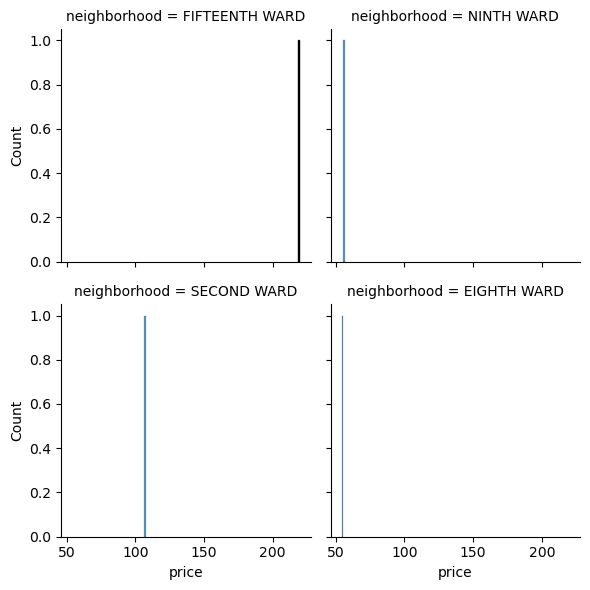

In [26]:
# D4: your code here
fg = seaborn.FacetGrid(four_nhoods, col = 'neighborhood', col_wrap = 2)
plot = fg.map_dataframe(seaborn.histplot, x = 'price')
plt.show()

---
<span style="color:blue">**Exercise D5.**</span> (2 points) In no more than 3 sentences: describe any differences between the neighborhood summary statistics and the overall summary statistics for the city of Albany in a text markdown cell. Compare the sample sizes and averages between the neighborhood-level results and the overall results. Focus on any significant differences in the averages (e.g., price, review scores) and examine neighborhoods with extreme values. Consider whether some neighborhoods are more representative of the overall sample than others. Comment in no more than 3 sentences on whether you think the summary statistics for the neighborhoods are representative of the overall sample, and why.

**ENTER YOUR ANSWER HERE:**
I think that neighborhood summary statistics would be representative of the overall sample because we can see the most popular property types of each neighborhood and the statistics for each of them. Neighborhoods that have more of the popular property types (entire rental units) would be more representative of the overall sample since there would be more of those properties. While the numbers won't be 100% accurate because of the existence of other types of property types, summary statistics for neighborhoods provide a good representation of the overall sample as a whole. 

---

# Part 3: COVID Dataset

Here we will study statewide COVID case numbers for NY state. The data file is released by [New York State](https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/jvfi-ffup/about_data). Data are updated daily with a 3-day lag. The zip file contains a file `covid_statewide.tsv`. `tsv`, or `tab-separated values`, is similar to a `csv` but values within a record are separated by `tab` rather than `comma`.

### Goal: Preprocessing data.

<span style="color:blue">**Exercise E1.**</span> (3 points) The `dtype` for the column `"Total New Positives"` is `object`.
In pandas dataframes, columns with mixed types or strings are stored as the `object` type. The `dtype` of `"Total New Positives"` is `object` because the numbers contain thousands commas (e.g. "1,000"). By default, the thousands comma is treated as a character and so the column doesn’t get parsed as a numeric type.

Use `pd.read_csv()` to read the tsv files. Please read the [`pd.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) documentation to see how to both 1) read tsv and 2) resolve the thousands comma. Name the dataframe `statewide_covid_df`. Use `iloc` to display the **last** five rows and **first** five columns of this dataframe.

*Hint: you'll need to specify how each column in the tsv file is separated when running `pd.read_csv()`.*

* **Confidence check 1:** Make sure that the data type of column `"Total New Positives"` is `int64`.

* **Confidence check 2:** If you print the dataframe, numbers in `Total New Positives` will appear without commas.

<span style="color:blue">**--Additional Resources--**</span>

Read more about `object` here: https://stackoverflow.com/questions/34881079/pandas-distinction-between-str-and-object-types

In [27]:
# E1: your code here
statewide_covid_df = pd.read_csv('covid_statewide.tsv', \
                                 sep = '\t', thousands = ',')

print(statewide_covid_df.iloc[-5:, :5])

       Test Date Geography Description Geography Level  Total New Positives  \
1978  03/05/2020             STATEWIDE       STATEWIDE                   17   
1979  03/04/2020             STATEWIDE       STATEWIDE                   20   
1980  03/03/2020             STATEWIDE       STATEWIDE                   11   
1981  03/02/2020             STATEWIDE       STATEWIDE                    2   
1982  03/01/2020             STATEWIDE       STATEWIDE                    2   

     Total Cases Per 100k  
1978                 NONE  
1979                  NaN  
1980                 NONE  
1981                   **  
1982                 NONE  


In [28]:
# Given code (confidence check 1):
print(statewide_covid_df['Total New Positives'].dtype)

# Given code (confidence check 2):
print(statewide_covid_df.head())

int64
    Test Date Geography Description Geography Level  Total New Positives  \
0  06/11/2022             STATEWIDE       STATEWIDE                 3607   
1  07/20/2024             STATEWIDE       STATEWIDE                 1503   
2  11/07/2022             STATEWIDE       STATEWIDE                 7067   
3  09/01/2021             STATEWIDE       STATEWIDE                 5439   
4  08/14/2021             STATEWIDE       STATEWIDE                 3134   

  Total Cases Per 100k  Total Cases Per 100k (7-day avg)  New Positives PCR  \
0                18.46                             29.73               2691   
1                 7.68                             10.42                841   
2                36.16                             27.99               5377   
3                27.83                             25.20               4400   
4                16.04                             21.69               2442   

   Cases Per 100k PCR  New Positives Antigen  Cases Per 100k A

---

<span style="color:blue">**Exercise E2.**</span> (1 point)

You will notice `NaN` values in some of the entries when you print the dataframe (for example, if you print `statewide_covid_df.iloc[-5:,:5]`). Look at the data file and online resources (e.g. documentation of `pandas` library). In the markdown cell, explain what `NaN` means, what datatype is `NaN`, and why these values appear.
Remember to update `Problem 0` with the online resources you use.

**ENTER YOUR ANSWER HERE:**
NaN represents missing data and stands for "Not a Number" in python. NaN is a float, and they appear in place of missing data values in a pandas dataframe. 

---
### Goal: Fixing wrong data and setting desired datatypes.





If you run the _first_ cell below, you'll notice that the data type (`dtype`) of the column `"Total Cases Per 100k"` is `object` instead of a numeric data type such as `int` or `float`.  

If you run the _second_ cell below, you'll notice it's because some values in the column are `"NONE` or `"**"`. So, `pandas` was not able to convert the column into numeric data.


In [29]:
# E3 Given code
print(statewide_covid_df['Total Cases Per 100k'].dtype)

object


In [30]:
# E3 Given code
print(statewide_covid_df['Total Cases Per 100k'].sort_values().unique())

['**' '10.01' '10.02' ... '99.5' 'NONE' nan]


<span style="color:blue">**Exercise E3.**</span> (2 points) Convert the `"NONE"` or `"**"` values in the `"Total Cases Per 100k"` to `np.nan` (which is the `NaN` value). You can use `pd.Series.replace()` to achieve this. Remember to assign the resulting column back to the same column name, so the column in the dataframe actually gets updated.

**Confidence check:** You should not see `"NONE"` or `"**"` in `print(statewide_covid_df["Total Cases Per 100k"].sort_values().unique())` afterwards.

In [31]:
# E3: your code here
statewide_covid_df["Total Cases Per 100k"] = statewide_covid_df\
                ["Total Cases Per 100k"].replace(["NONE", "**"], np.nan)

# Given code (confidence check)
print(statewide_covid_df["Total Cases Per 100k"].sort_values().unique())

['10.01' '10.02' '10.08' ... '96.72' '99.5' nan]


---

<span style="color:blue">**Exercise E4.**</span> (2 points) Transform the same column to `float` type. Again, remember to name the resulting column with the same name, so the `"Total Cases Per 100k"` column in the dataframe actually gets updated. Use `iloc` to display the first five rows and columns of this dataframe.

**Confidence check:** Check using `.dtype` that `"Total Cases Per 100k"` has changed to `float64`.

In [32]:
# E4: your code here
statewide_covid_df["Total Cases Per 100k"] = statewide_covid_df\
                ["Total Cases Per 100k"].astype(float)
print(statewide_covid_df.iloc[:5, :5])

    Test Date Geography Description Geography Level  Total New Positives  \
0  06/11/2022             STATEWIDE       STATEWIDE                 3607   
1  07/20/2024             STATEWIDE       STATEWIDE                 1503   
2  11/07/2022             STATEWIDE       STATEWIDE                 7067   
3  09/01/2021             STATEWIDE       STATEWIDE                 5439   
4  08/14/2021             STATEWIDE       STATEWIDE                 3134   

   Total Cases Per 100k  
0                 18.46  
1                  7.68  
2                 36.16  
3                 27.83  
4                 16.04  


In [33]:
# Given code (confidence check):
print(statewide_covid_df["Total Cases Per 100k"].dtype)

float64


---

<span style="color:blue">**Exercise E5.**</span> (2 points) There are a number of missing values in `"TotalCasesPer100k"`. After fixing the ** and NONE values, additional data documentation tells you that missing values occur when the number of cases per 100k is less than 3. Using `SQL`, create a new dataframe called `recode_missing_sql` that sets all missing values of `"TotalCasesPer100k"` to 3 using the SQL [`CASE`](https://duckdb.org/docs/sql/expressions/case.html) function. Display only the columns `"TestDate"` and `"TotalCasesPer100k"` in the output. Use `iloc` to display the first fifteen rows of this dataframe.

*Hint: handling missing values is sometimes inconsistent across systems, so we'll give you this one. In SQL, you can use:* `isnan(TotalCasesPer100k) is null`

In [34]:
# E5: your code here
recode_missing_sql = duckdb.sql("""SELECT "Test Date", \
                            CASE \
                                WHEN "Total Cases Per 100k" IS NULL THEN 3 \
                                ELSE "Total Cases Per 100k" \
                            END \
                            FROM statewide_covid_df""").df()
print(recode_missing_sql.iloc[:15])                                                                         

      Test Date  \
0    06/11/2022   
1    07/20/2024   
2    11/07/2022   
3    09/01/2021   
4    08/14/2021   
5    08/05/2020   
6   Apr 08 2020   
7    12/09/2022   
8   May 08 2023   
9    09/29/2020   
10  Mar-30-2021   
11   05/28/2023   
12     07/16/20   
13   04/13/2024   
14     07/28/21   

    CASE  WHEN (("Total Cases Per 100k" IS NULL)) THEN (3) ELSE "Total Cases Per 100k" END  
0                                               18.46                                       
1                                                7.68                                       
2                                               36.16                                       
3                                               27.83                                       
4                                               16.04                                       
5                                                3.85                                       
6                                           

---

<span style="color:blue">**Exercise E6.**</span> (2 points) Now, using pandas, modify the original dataframe `statewide_covid_df` to set all missing values of `"TotalCasesPer100k"` to 3. Display `statewide_covid_df` with only the columns `Test Date` and `Total Cases Per 100k`. Use `iloc` to display the first fifteen rows of this dataframe.

In [35]:
# E6: your code here
statewide_covid_df['Total Cases Per 100k'] = statewide_covid_df\
                ['Total Cases Per 100k'].replace([np.NaN], 3)
print(statewide_covid_df[['Test Date', 'Total Cases Per 100k']].iloc[:15])

      Test Date  Total Cases Per 100k
0    06/11/2022                 18.46
1    07/20/2024                  7.68
2    11/07/2022                 36.16
3    09/01/2021                 27.83
4    08/14/2021                 16.04
5    08/05/2020                  3.85
6   Apr 08 2020                 54.48
7    12/09/2022                 38.07
8   May 08 2023                  4.08
9    09/29/2020                  8.32
10  Mar-30-2021                 44.96
11   05/28/2023                  3.00
12     07/16/20                  4.72
13   04/13/2024                  3.00
14     07/28/21                 16.01


---

<span style="color:blue">**Exercise E7.**</span> (2 points) If you print the data type of the `Test Date` column, you'll notice that the `Test Date` column is being read as a string. Modifying `statewide_covid_df`, convert this field to a date using the `pandas` function `to_datetime`. You may need to specify the argument `format` in order to convert successfully. Use `iloc` to display the first five rows and columns of this dataframe.

In [36]:
# E7: your code here
statewide_covid_df['Test Date'] = pd.to_datetime(statewide_covid_df\
                                        ['Test Date'], format = 'mixed')
print(statewide_covid_df.iloc[:5, :5])

   Test Date Geography Description Geography Level  Total New Positives  \
0 2022-06-11             STATEWIDE       STATEWIDE                 3607   
1 2024-07-20             STATEWIDE       STATEWIDE                 1503   
2 2022-11-07             STATEWIDE       STATEWIDE                 7067   
3 2021-09-01             STATEWIDE       STATEWIDE                 5439   
4 2021-08-14             STATEWIDE       STATEWIDE                 3134   

   Total Cases Per 100k  
0                 18.46  
1                  7.68  
2                 36.16  
3                 27.83  
4                 16.04  


---

<span style="color:blue">**Exercise E8.**</span> (1 point) Briefly explain why you need to specify `format` in `Problem E7`.





**ENTER YOUR ANSWER HERE:**
The time data values were either in the "%m/%d/%Y" format or the ISO8601 format. Since it is hard to determine which values followed which format in a concise amount of code, specifying that the format was mixed is important to successfully converting the Test Date column from a string to dates. 

---

<span style="color:blue">**Exercise E9.**</span> (2 points) Create three new columns: `Year`, `Month`, and `Quarter`. Set these to the value of the `year`, `month`, and `quarter` properties for the `Test Date` field. You can do this by extracting the relevant datetime attributes from `Test Date` (e.g., [`dt.month`](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html)). Use `loc` to display the three newly created columns and use `head()` to display the first five rows.

In [37]:
# E9: your code here
Year = statewide_covid_df['Test Date'].dt.year
Month = statewide_covid_df['Test Date'].dt.month
Quarter = statewide_covid_df['Test Date'].dt.quarter

statewide_covid_df['Year'] = Year
statewide_covid_df['Month'] = Month
statewide_covid_df['Quarter'] = Quarter

print(statewide_covid_df.loc[:, ['Year', 'Month', 'Quarter']].head())

   Year  Month  Quarter
0  2022      6        2
1  2024      7        3
2  2022     11        4
3  2021      9        3
4  2021      8        3


---

<span style="color:blue">**Exercise E10.**</span> (1 point) Describe at least one advantage to use a parsed date object over a string representation.


**ENTER YOUR ANSWER HERE**: A parsed date object allows you to extract the year, month, and quarter directly from the dataframe while a string representation doesn't allow you to extract parts of the date. Using these extractions, you can more efficiently gather data and perform calculations. 

---

### Goal: Cleaning duplicated data.

The number of unique values in the `Test Date` column is less than the number of records in the dataframe. This means there are duplicated values in the `Test Date` column. Duplicates are a problem because they may produce incorrect results when computing summary statistics. For example, if you want to count the number of observations by `Test Date`, the duplicates in the data will result in doubled counts.

<span style="color:blue">**--Additional Resources--**</span>

Read more about `nunique()` here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html

In [38]:
# E11 Given code
print("Number of records: ", len(statewide_covid_df['Test Date']))
print("Number of unique values of Date: ", statewide_covid_df\
                                      ['Test Date'].nunique())

Number of records:  1983
Number of unique values of Date:  1642


---

<span style="color:blue">**Exercise E11.**</span> (2 points) In the COVID dataset, we expect that there is only one row for each `Test Date`. The cell below shows rows with the same `Test Date`. For example, we see that there are two rows with date `2020-03-01`. Observe that many of these are perfect duplicates, which means that every entry in the row is the same. As a result, you can simply drop duplicates using the pandas function `pd.drop_duplicates()`. Set the appropriate `keep` argument. Remember to name the resulting dataframe as `statewide_covid_df` (the same name) so the dataframe actually gets updated. Use `iloc` to display the first five rows and columns of this dataframe.

**Confidence check:** Check that the size of the dataframe now matches the number of unique values of `Test Date`: `statewide_covid_df.shape[0] == statewide_covid_df['Test Date'].nunique()`

<span style="color:blue">**--Additional Resources--**</span>

Read more about `df.duplicated()` here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

**Note:** In E11, you are now redefining `statewide_covid_df` so be careful if you run previous cells after you run E10. Be sure to always clear all outputs and run the notebook from top to bottom to ensure you are getting the outputs you want.

In [39]:
# E11 Given code
statewide_covid_df[statewide_covid_df.duplicated(keep=False)]\
                .sort_values('Test Date').head()

,Test Date,Geography Description,Geography Level,Total New Positives,Total Cases Per 100k,Total Cases Per 100k (7-day avg),New Positives PCR,Cases Per 100k PCR,New Positives Antigen,Cases Per 100k Antigen,Total Cases Per 100korig,Test Date - Orig,Year,Month,Quarter
1982,2020-03-01,STATEWIDE,STATEWIDE,2,3.0,0.01,2,0.01,0,0.00,0.01,2020-03-01,2020,3,1
196,2020-03-01,STATEWIDE,STATEWIDE,2,3.0,0.01,2,0.01,0,0.00,0.01,2020-03-01,2020,3,1
1981,2020-03-02,STATEWIDE,STATEWIDE,2,3.0,0.01,2,0.01,0,0.00,0.01,2020-03-02,2020,3,1
268,2020-03-02,STATEWIDE,STATEWIDE,2,3.0,0.01,2,0.01,0,0.00,0.01,2020-03-02,2020,3,1
1975,2020-03-08,STATEWIDE,STATEWIDE,56,3.0,0.13,28,0.14,28,0.14,0.29,2020-03-08,2020,3,1


In [40]:
# E11: your code here
statewide_covid_df = statewide_covid_df.drop_duplicates\
            (subset = ['Test Date'])
print(statewide_covid_df.iloc[:5, :5])

   Test Date Geography Description Geography Level  Total New Positives  \
0 2022-06-11             STATEWIDE       STATEWIDE                 3607   
1 2024-07-20             STATEWIDE       STATEWIDE                 1503   
2 2022-11-07             STATEWIDE       STATEWIDE                 7067   
3 2021-09-01             STATEWIDE       STATEWIDE                 5439   
4 2021-08-14             STATEWIDE       STATEWIDE                 3134   

   Total Cases Per 100k  
0                 18.46  
1                  7.68  
2                 36.16  
3                 27.83  
4                 16.04  


---

### Goal: Renaming columns.

The column names of the original CSV file were intended to be read by people, so they include spaces and additional words. When working with DataFrames, we want columns to be easy to use as variables.

<span style="color:blue">**Exercise E12.**</span> (2 points) Use either `pandas` or `SQL` to replace the following column headers.

    "Test Date" -> "TestDate",
    "Total New Positives" -> "TotalNewPositives",
    "Total Cases Per 100k" -> "TotalCasesPer100k",
    "Total Cases Per 100k (7-day avg)" -> "TotalCasesPer100k7DayAvg"

Include only the `TestDate`, `Year`, `Month`, `Quarter`,  `TotalNewPositives`, `TotalCasesPer100k`, and `TotalCasesPer100k7DayAvg` in the resulting dataframe. Make sure you name the resulting dataframe `statewide_covid_df` so the variable gets updated. Use `iloc` to display the first five rows and columns of this dataframe.

In [41]:
# E12: your code here
statewide_covid_df = duckdb.sql("""SELECT "Test Date" AS TestDate, \
                                    "Year", \
                                    "Month", \
                                    "Quarter", \
                                    "Total New Positives" \
                                        AS TotalNewPositives, \
                                    "Total Cases Per 100k" \
                                        AS TotalCasesPer100k, \
                                    "Total Cases Per 100k (7-day avg)" \
                                        AS TotalCasesPer100k7DayAvg \
                                FROM statewide_covid_df""").df()

# E12 Given code
print(statewide_covid_df.iloc[:5,:5])

    TestDate  Year  Month  Quarter  TotalNewPositives
0 2022-06-11  2022      6        2               3607
1 2024-07-20  2024      7        3               1503
2 2022-11-07  2022     11        4               7067
3 2021-09-01  2021      9        3               5439
4 2021-08-14  2021      8        3               3134


---

### Goal: Using Pandas and SQL to perform Groupby.




<span style="color:blue">**Exercise F1.**</span> (2 points)

Part a: Using `time.time()` from the `time` package, save the start time in a variable called `start_time_sql`.

Part b:
Use a SQL `SELECT` statement to display the year, month, and average number of positive tests per month from January 2023 to August 2024 (*hint*: August 2024 is the most recent month included in the dataframe). Order by Year and Month chronologically (from earliest to latest month). Name the resulting dataframe `year_month_summary_sql` and print it.

Part c:
Subtract `start_time_sql` from `time.time()` once you've finished the SQL query and display it.

In [42]:
# F1 part a: your code here
start_time_sql = time.time()

# F1 part b: your code here
year_month_summary_sql = duckdb.sql("""SELECT Year, Month, \
                                            AVG(TotalNewPositives) \
                                        FROM statewide_covid_df \
                                        WHERE Year >= 2023 \
                                            AND Month BETWEEN 1 AND 8 \
                                        GROUP BY Year, Month
                                        ORDER BY Year, Month""").df()
print(year_month_summary_sql)

# F1 part c: your code here
print(time.time() - start_time_sql)

    Year  Month  avg(TotalNewPositives)
0   2023      1             5247.838710
1   2023      2             2849.821429
2   2023      3             1489.000000
3   2023      4              764.366667
4   2023      5              635.935484
5   2023      6              542.833333
6   2023      7              797.774194
7   2023      8             2099.032258
8   2024      1             4243.967742
9   2024      2             1782.620690
10  2024      3              684.870968
11  2024      4              493.200000
12  2024      5              657.806452
13  2024      6             1124.666667
14  2024      7             1979.354839
15  2024      8             1868.642857
0.0047070980072021484


---

<span style="color:blue">**Exercise F2.**</span> (2 points)

Part a: Using `time.time()` from the `time` package, save the start time in a variable called `start_time_pd`.

Part b: Use pandas `groupby()` and `mean()` to display the same information as the previous question (year, month, average of total new positives). Use `loc[]` to filter for the appropriate Year and Month values. Name the resulting dataframe `year_month_summary_pd` and reset the index using `reset_index()`. Print `year_month_summary_pd` and ensure it is sorted by Year and Month chronologically (from earliest to latest month).

Part c:
Subtract `start_time_pd` from `time.time()` once you've finished the SQL query and display it.

**Confidence check:** Your answer should be the same as F1.


In [43]:
# F2 part a: your code here
start_time_pd = time.time()

# F2 part b: your code here
year_month_summary_pd = statewide_covid_df.groupby(['Year', 'Month'])\
                                    ['TotalNewPositives'].mean().reset_index()

year_month_summary_pd = year_month_summary_pd.loc[(year_month_summary_pd\
                ['Year'] >= 2023) & (year_month_summary_pd['Month'] >= 1) & \
                (year_month_summary_pd['Month'] <= 8)].sort_values(by = 'Year')\
                .reset_index(drop = True)
print(year_month_summary_pd)

# F2 part c: your code here
print(time.time() - start_time_pd)

    Year  Month  TotalNewPositives
0   2023      1        5247.838710
1   2023      2        2849.821429
2   2023      3        1489.000000
3   2023      4         764.366667
4   2023      5         635.935484
5   2023      6         542.833333
6   2023      7         797.774194
7   2023      8        2099.032258
8   2024      1        4243.967742
9   2024      2        1782.620690
10  2024      3         684.870968
11  2024      4         493.200000
12  2024      5         657.806452
13  2024      6        1124.666667
14  2024      7        1979.354839
15  2024      8        1868.642857
0.004168987274169922


---

<span style="color:blue">**Problem F3.**</span> (1 point)

Which method of merging (either pandas or SQL) was faster? *Hint:* Consider the elapsed time in F1 and F2. Note that the dataframes we are using here are small and the time calculations are subject to small fluctuations, so your results may be unexpected.

**ENTER YOUR ANSWER HERE:** 
Using Pandas to merge was faster. The elapsed time when using pandas is always about 0.001 faster than when using SQL.

---

<span style="color:blue">**Problem F4.**</span> (1 point)

Which do you prefer: `sql` or `pandas`? Why?




**ENTER YOUR ANSWER HERE:** 
I prefer to use SQL because I found that the process of selecting the columns to display while also averaging the values of an existing column was much more straightforward than using pandas. It was also easier to group and sort the data when using SQL. Trying to select the Year and Month columns while also taking the average of the TotalNewPositives column was difficult for me when using pandas. 

### ET 

---

### Goal: Plotting time-series data.

<span style="color:blue">**Exercise G1.**</span> (2 points) Use the `seaborn` function `lineplot` to display a plot of `year_month_summary_pd`. Display the average number of new positive tests recorded per Month and use the `hue` argument to change the color of the line depending on the `Year`. The x-axis should be `Month` and the y-axis should be `TotalNewPositives`. Use the `pyplot` function [`xticks`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) to rotate the tick labels for the dates in the x-axis by 60 degrees. Note the plot should have two separate lines, one for each year.


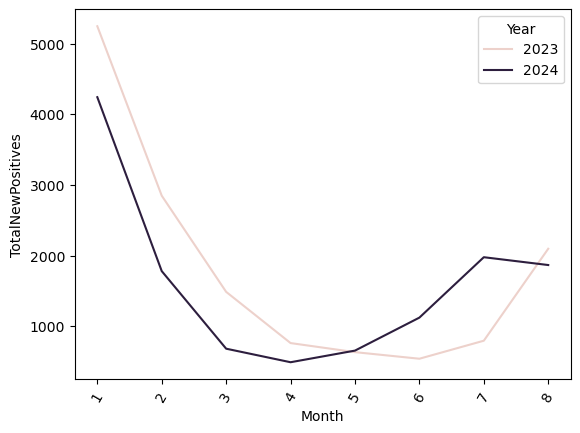

In [44]:
# G1: your code here
seaborn.lineplot(data = year_month_summary_pd, x = 'Month', \
                 y = 'TotalNewPositives', hue = 'Year')
plt.xticks(rotation = 60)
plt.show()

---

<span style="color:blue">**Exercise G2.**</span> (3 points) Use either SQL or pandas to create a new dataframe that contains only the data since June 1, 2024 (inclusive).

In [45]:
# G2: your code here
data_since_june = duckdb.sql("SELECT * FROM statewide_covid_df \
                                WHERE Year >= 2024 AND MONTH >= 6").df()
print(data_since_june)

     TestDate  Year  Month  Quarter  TotalNewPositives  TotalCasesPer100k  \
0  2024-07-20  2024      7        3               1503               7.68   
1  2024-06-29  2024      6        2               1034               5.25   
2  2024-06-07  2024      6        2                826               4.20   
3  2024-07-26  2024      7        3               2168              11.08   
4  2024-06-22  2024      6        2                932               4.74   
..        ...   ...    ...      ...                ...                ...   
84 2024-06-05  2024      6        2                998               5.07   
85 2024-06-04  2024      6        2               1057               5.37   
86 2024-06-03  2024      6        2               1080               5.49   
87 2024-06-02  2024      6        2                620               3.15   
88 2024-06-01  2024      6        2                508               3.00   

    TotalCasesPer100k7DayAvg  
0                      10.42  
1            

---

<span style="color:blue">**Exercise G3.**</span> (1 point) Plot the number of daily new positives tests for this subset by `"TestDate"` as the x-axis. Pick any color of your choosing to plot this line by specifying the `color` argument.

<span style="color:blue">**--Additional Resources--**</span>

Changing color for seaborn lineplot: https://stackoverflow.com/questions/58432235/changing-color-of-seaborn-plot-line

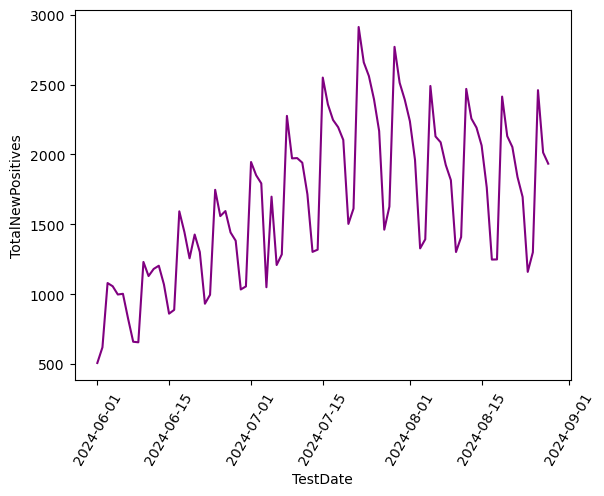

In [46]:
# G3: your code here
seaborn.lineplot(data = data_since_june, x = 'TestDate', \
                 y = 'TotalNewPositives', color = 'purple')
plt.xticks(rotation = 60)
plt.show()

---
<span style="color:blue">**Exercise G4.**</span> (3 points) Create a line plot showing the values for `"TotalCasesPer100k"` by `"TestDate"`. Specify `linewidth` argument to make the line thicker than default (i.e. thicker than the line in **Problem G1**).


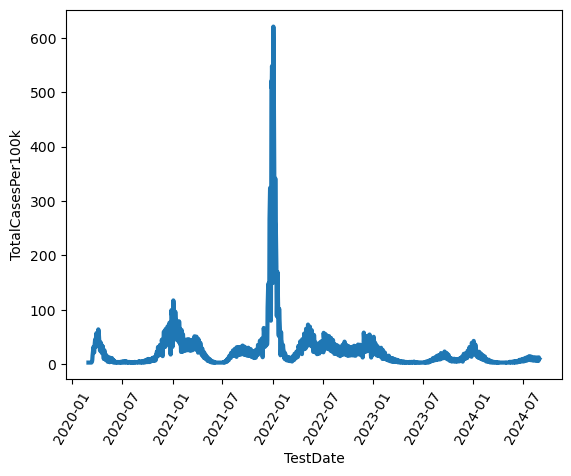

In [47]:
# G4: your code here:
seaborn.lineplot(data = statewide_covid_df, x = 'TestDate', \
                 y = 'TotalCasesPer100k', linewidth = 3)
plt.xticks(rotation = 60)
plt.show()

---

<span style="color:blue">**Exercise G5.**</span> (1 point) Describe any patterns you observe from the plot of Problem G3. Between G2 and G3, which do you think is more informative?


**ENTER YOUR ANSWER HERE:** 
The plot of problem G3 fluctuates up and down but follows the same upwards trend. Towards the end of the time frame, the plot begins to flatten out and slightly decrease, though it does still while still fluctuating. The plot of problem G4 is more dramatic and has a high peak at the beginning of 2022. There are smaller peaks throughout the time frame, but they are generally steady other than the main peak. 

The plot for G3 displays the total number of new positives cases that meet a certain time condition (dates since June 1, 2024). The plot for G4 displays the total number of positive cases for every population of 100,000 and across all dates. 

I think the plot for G4 is more informative because it provides the total number of positive cases for every 100k people, which means that you can compare this number to different populations around the world. In addition, the time range is greater for G4 so you can see more data over a larger range of time. Using the plot from G4, you can see all the data for several years and compare that to other populations. The plot for G3, while also informative, only allows you to observe the number of daily positive cases for dates after June 1, 2024. 

---

<span style="color:blue">**Exercise G6.**</span> (3 points)

Use the `.corr()` DataFrame function to display the correlations between `TotalNewPositives`, `TotalCasesPer100k`,  `TotalCasesPer100k7DayAvg`, `Year`, and `Quarter`. Display the result of this function (i.e. by typing `corr_df` instead of printing the result using `print(corr_df)`).

In [51]:
# G6: your code here
correlation = statewide_covid_df.loc[:, ['TotalNewPositives', \
    'TotalCasesPer100k', 'TotalCasesPer100k7DayAvg', 'Year', 'Quarter']]
correlation.corr()

,TotalNewPositives,TotalCasesPer100k,TotalCasesPer100k7DayAvg,Year,Quarter
TotalNewPositives,1.000000,0.999973,0.912120,-0.133917,0.010137
TotalCasesPer100k,0.999973,1.000000,0.911977,-0.134877,0.009168
TotalCasesPer100k7DayAvg,0.912120,0.911977,1.000000,-0.127016,-0.049382
Year,-0.133917,-0.134877,-0.127016,1.000000,-0.208148
Quarter,0.010137,0.009168,-0.049382,-0.208148,1.000000


---

<span style="color:blue">**Exercise G7.**</span> (1 point) In no more than three sentences, comment on the relationship between (1) `TotalNewPositives` and `Year` and (2) `TotalNewPositives` and `TotalCasesPer100k`. Are the results that you observe expected?


**ENTER YOUR ANSWER HERE:**
(1) As time progresses (as the Year increases and becomes closer to the present day), the number of Total New Positives decreases, and there is a negative correlation. (2) As the number of Total New Positives increases, the number of Total Cases Per 100k also increases though at a slightly different (or slower) rate. This is a positive, but not perfect, correlation. 